Data types of columns:
pdb_id            object
chain_code        object
seq               object
sst8              object
sst3              object
len                int64
has_nonstd_aa    float64
Exptl.            object
resolution       float64
R-factor         float64
FreeRvalue       float64
dtype: object

First few rows of the dataframe:
  pdb_id chain_code                   seq                  sst8  \
0   1FV1          F  NPVVHFFKNIVTPRTPPPSQ  CCCCCBCCCCCCCCCCCCCC   
1   1LM8          H  DLDLEMLAPYIPMDDDFQLR  CCCCCCCCCBCCSCCCEECC   
2   1O06          A  EEDPDLKAAIQESLREAEEA  CCCHHHHHHHHHHHHHHHTC   
3   1QOW          D  CTFTLPGGGGVCTLTSECI*  CCTTSCTTCSSTTSSTTCCC   
4   1RDQ          I  TTYADFIASGRTGRRNAIHD  CHHHHHHTSSCSSCCCCEEC   

                   sst3  len  has_nonstd_aa Exptl.  resolution  R-factor  \
0  CCCCCECCCCCCCCCCCCCC   20            NaN   XRAY        1.90      0.23   
1  CCCCCCCCCECCCCCCEECC   20            NaN   XRAY        1.85      0.20   
2  CCCHHHHHHHHHHHHHHHCC

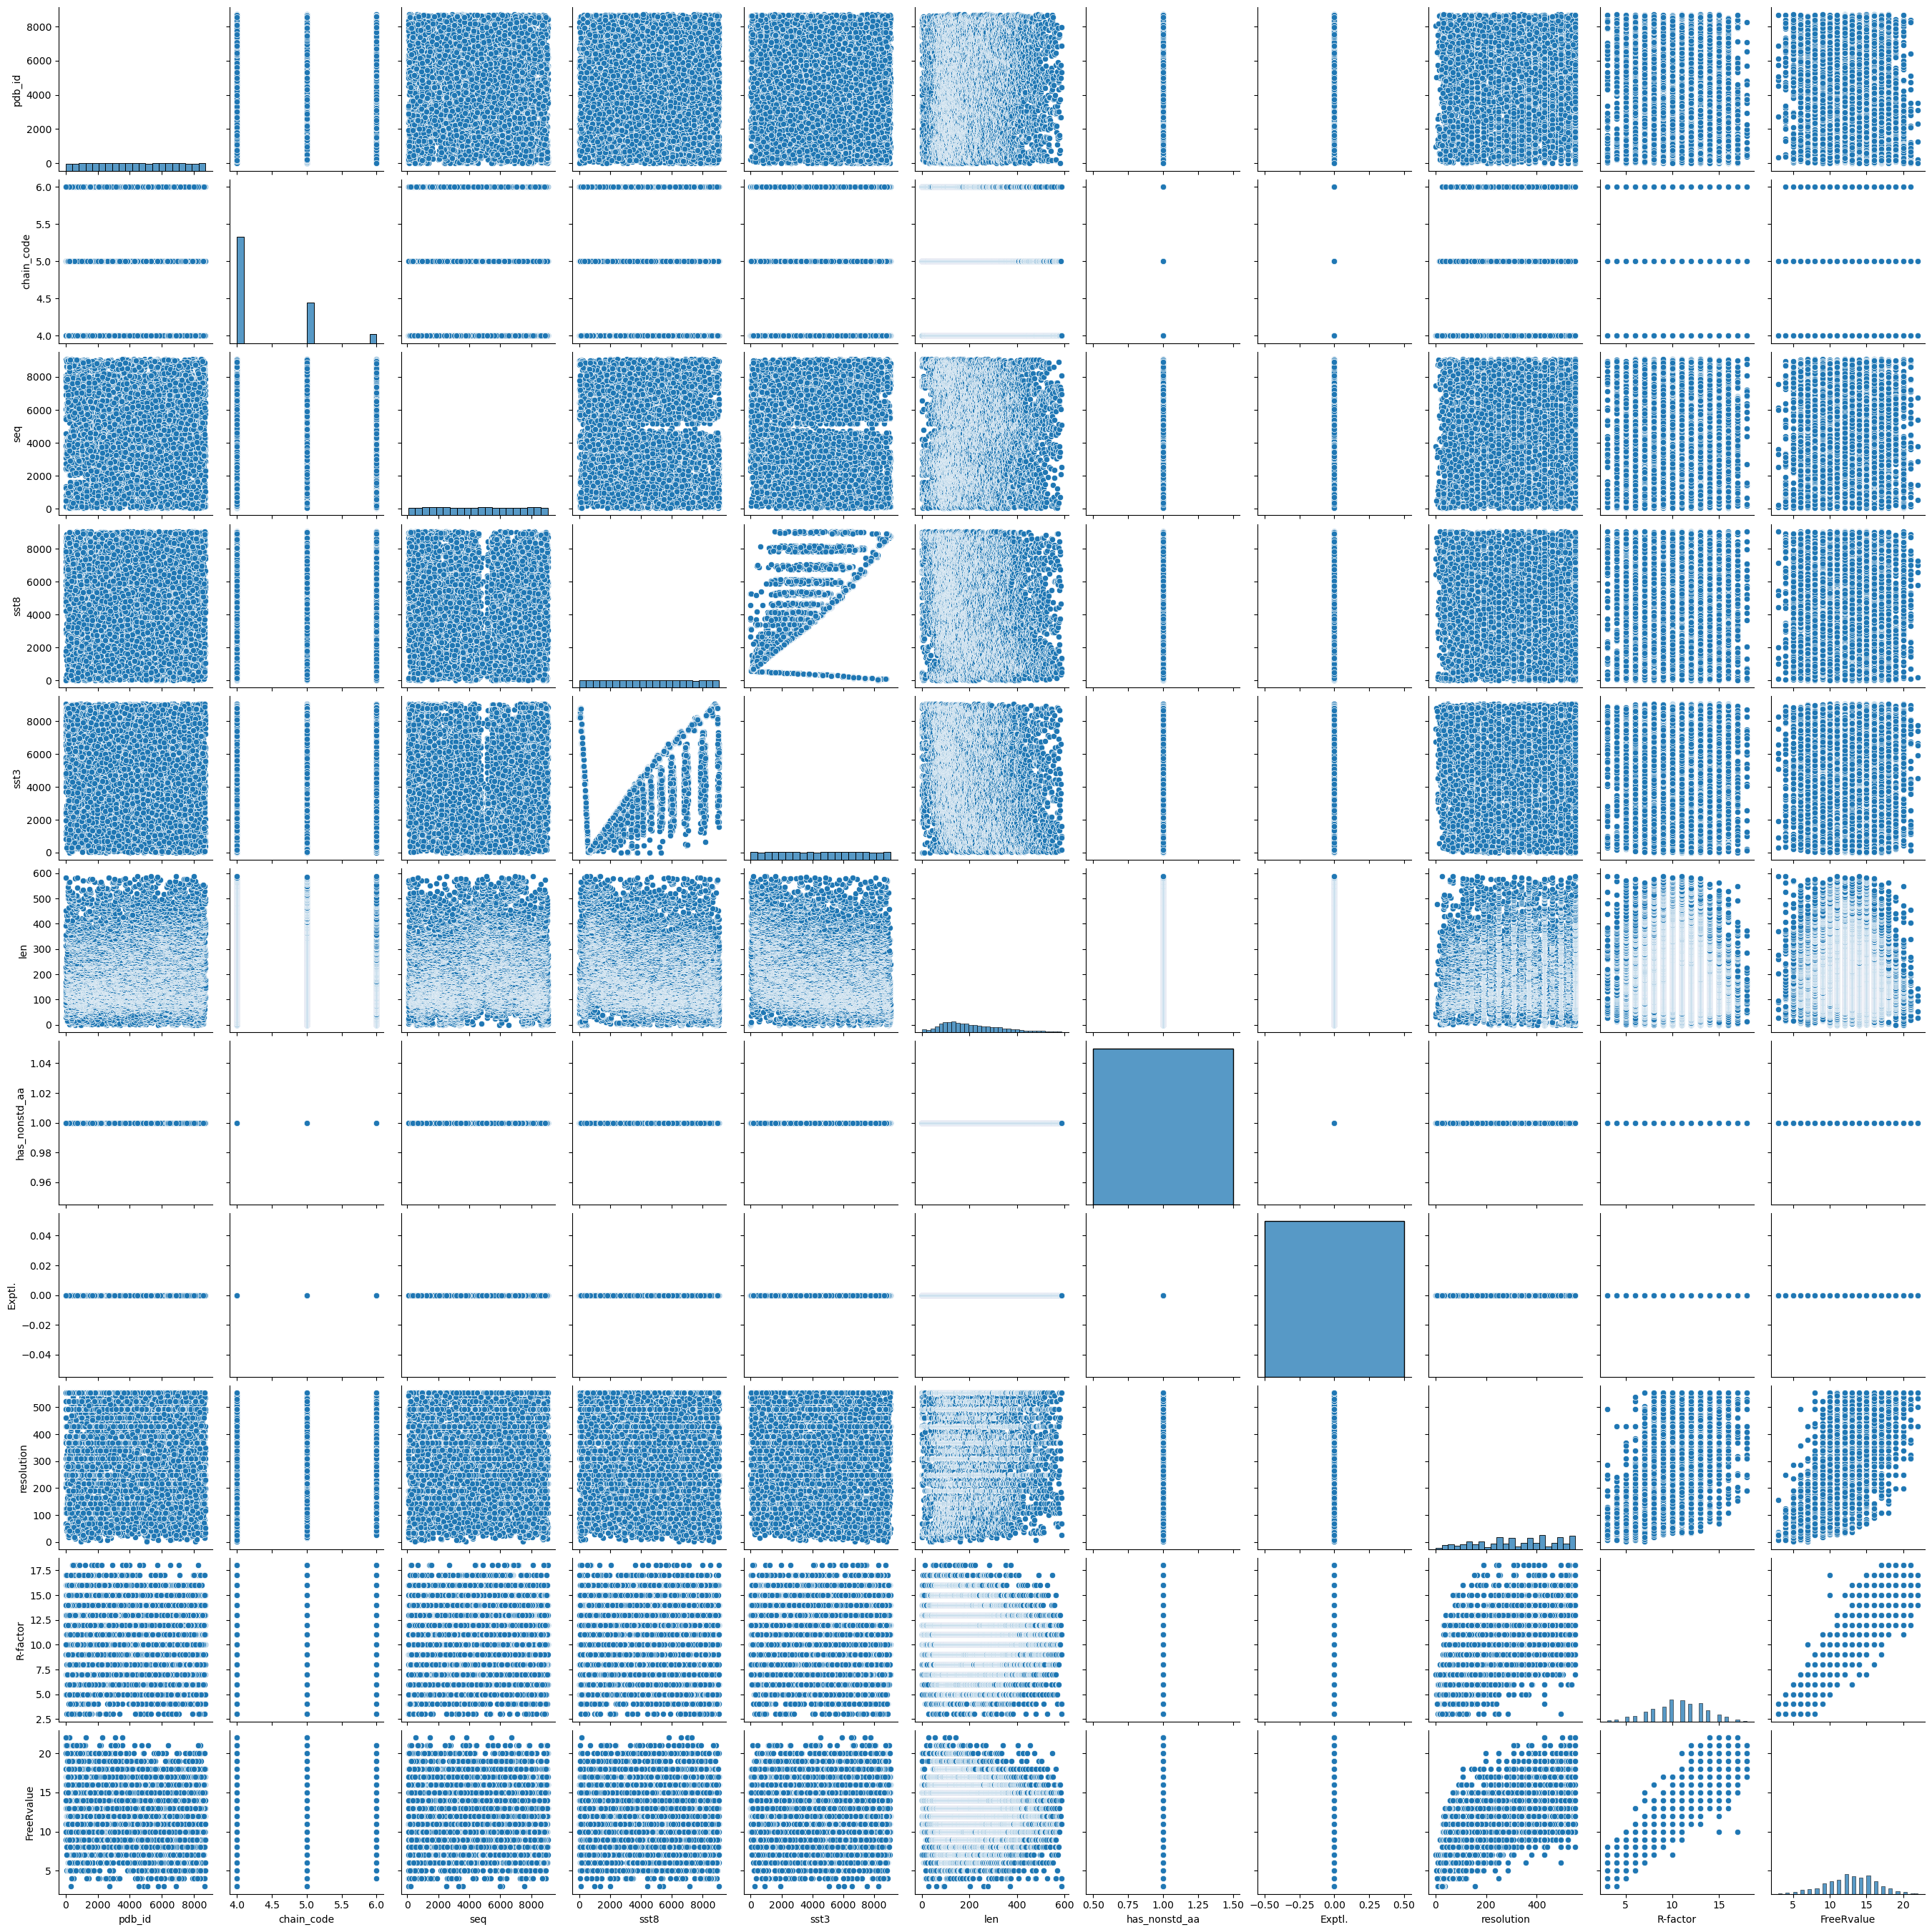

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_recall_curve, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load the dataset
df = pd.read_csv('ML-PROJECT.csv')

# Display data types of columns
print("Data types of columns:")
print(df.dtypes)

# Display the first few rows of the dataframe
print("\nFirst few rows of the dataframe:")
print(df.head())

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical features
df['pdb_id'] = le.fit_transform(df['pdb_id'])
df['chain_code'] = le.fit_transform(df['chain_code'])
df['seq'] = le.fit_transform(df['seq'])
df['sst8'] = le.fit_transform(df['sst8'])
df['sst3'] = le.fit_transform(df['sst3'])
df['len'] = le.fit_transform(df['len'])
df['has_nonstd_aa'] = le.fit_transform(df['has_nonstd_aa'])
df['Exptl.'] = le.fit_transform(df['Exptl.'])
df['resolution'] = le.fit_transform(df['resolution'])
df['R-factor'] = le.fit_transform(df['R-factor'])
df['FreeRvalue'] = le.fit_transform(df['FreeRvalue'])

# Try to convert all columns to numeric, coerce errors to NaN
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Display the data types again to see changes
print("\nData types of columns after conversion:")
print(df.dtypes)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Handle outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Only keep numeric columns for pairplot
numeric_df = df.select_dtypes(include=[np.number])

# Check for and remove NaN values before plotting
numeric_df = numeric_df.dropna()

# Conduct exploratory data analysis (EDA)
sns.pairplot(numeric_df)
plt.show()

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7895 entries, 2 to 8841
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   pdb_id         7895 non-null   int32
 1   chain_code     7895 non-null   int32
 2   seq            7895 non-null   int32
 3   sst8           7895 non-null   int32
 4   sst3           7895 non-null   int32
 5   len            7895 non-null   int64
 6   has_nonstd_aa  7895 non-null   int64
 7   Exptl.         7895 non-null   int32
 8   resolution     7895 non-null   int64
 9   R-factor       7895 non-null   int64
 10  FreeRvalue     7895 non-null   int64
dtypes: int32(6), int64(5)
memory usage: 555.1 KB


In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
# Check the column names in your DataFrame
print(df.columns)

Index(['pdb_id', 'chain_code', 'seq', 'sst8', 'sst3', 'len', 'has_nonstd_aa',
       'Exptl.', 'resolution', 'R-factor', 'FreeRvalue'],
      dtype='object')


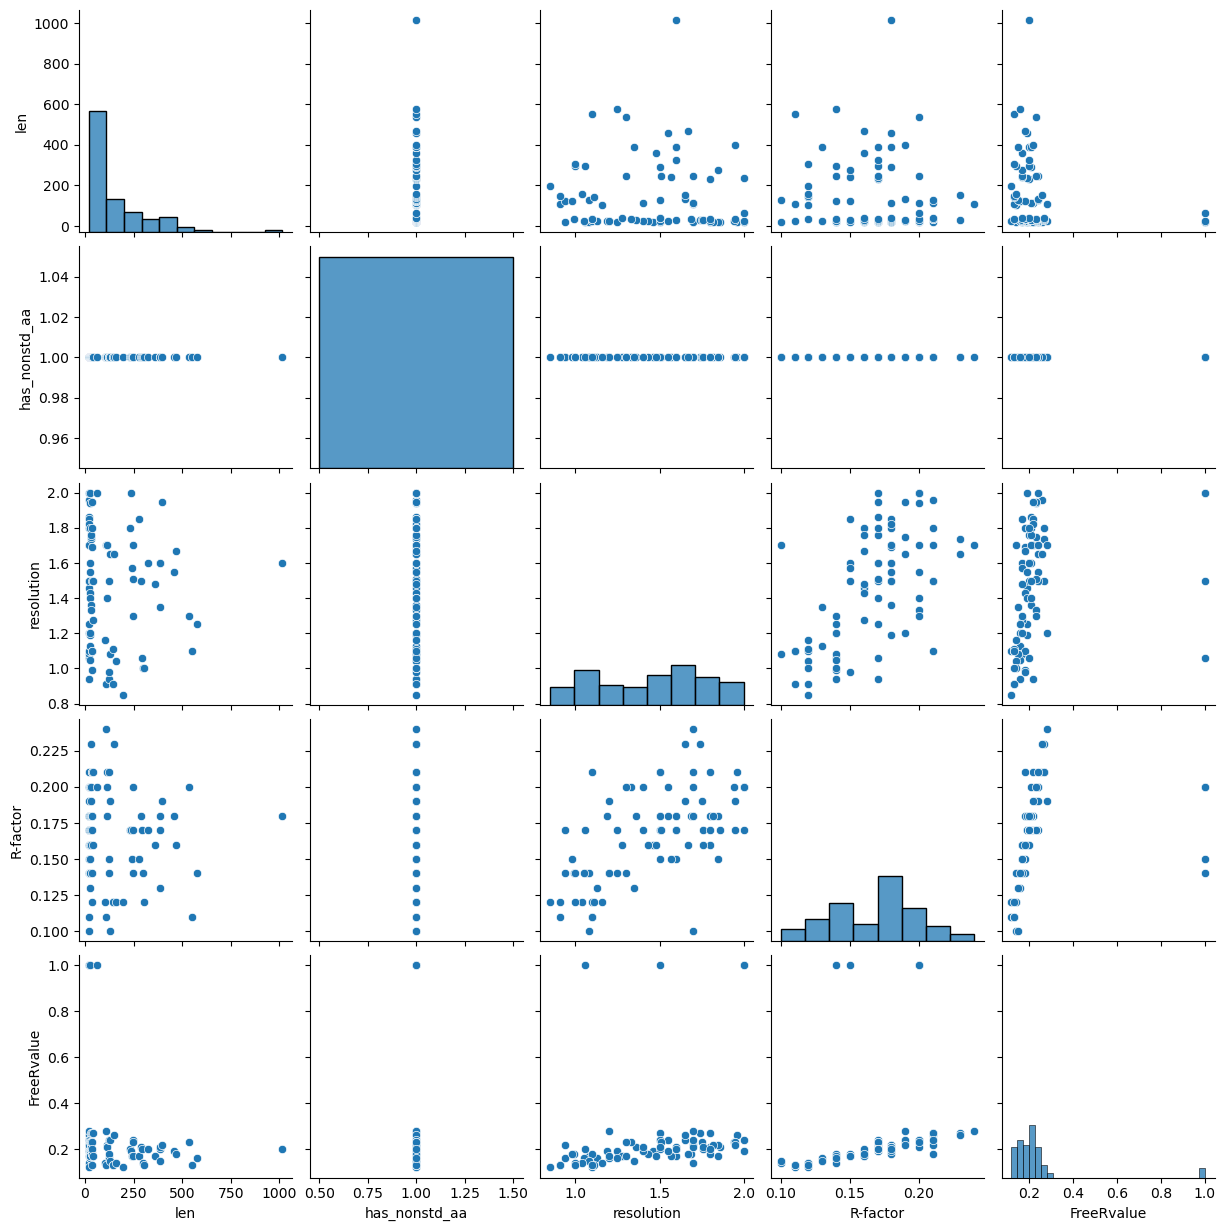


First few rows of the dataframe after binning and encoding:
  pdb_id chain_code  seq  sst8  sst3 len  has_nonstd_aa  Exptl. resolution  \
0    NaN        NaN  NaN   NaN   NaN   0            NaN     NaN          4   
1    NaN        NaN  NaN   NaN   NaN   0            NaN     NaN          4   
2    NaN        NaN  NaN   NaN   NaN   0            NaN     NaN          3   
3    NaN        NaN  NaN   NaN   NaN   0            1.0     NaN          1   
4    NaN        NaN  NaN   NaN   NaN   0            NaN     NaN          2   

  R-factor FreeRvalue  
0        4          1  
1        3          0  
2        3          0  
3        1          4  
4        1          0  


In [76]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

df = load_csv('ML-PROJECT.csv')

# Only keep numeric columns for pairplot
numeric_df = df.select_dtypes(include=[np.number])

# Check for and remove NaN values before plotting
numeric_df = numeric_df.dropna()

# Conduct exploratory data analysis (EDA)
sns.pairplot(numeric_df)
plt.show()

# Binning continuous features
# Check if columns exist before binning
columns_to_bin = [
    'pdb_id', 'chain_code', 'seq', 'sst8', 'sst3', 
    'len', 'has_nonstd_aa', 'Exptl.', 'resolution', 
    'R-factor', 'FreeRvalue'
]

for col in columns_to_bin:
    if col in df.columns:
        # Convert column to numeric where possible
        df[col] = pd.to_numeric(df[col], errors='coerce')
        if df[col].nunique() > 1:  # Ensure there are enough unique values to bin
            df[col] = pd.cut(df[col], bins=5, labels=range(5), duplicates='drop')

# Define categorical features if not already defined
# Assuming the DataFrame has categorical features you want to encode
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Encoding categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Display the first few rows of the dataframe after binning and encoding
print("\nFirst few rows of the dataframe after binning ")
print(df.head())

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9078 entries, 0 to 9077
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   pdb_id         28 non-null     category
 1   chain_code     9 non-null      category
 2   seq            0 non-null      float64 
 3   sst8           0 non-null      float64 
 4   sst3           0 non-null      float64 
 5   len            9078 non-null   category
 6   has_nonstd_aa  84 non-null     float64 
 7   Exptl.         0 non-null      float64 
 8   resolution     9078 non-null   category
 9   R-factor       9078 non-null   category
 10  FreeRvalue     9078 non-null   category
dtypes: category(6), float64(5)
memory usage: 408.7 KB


In [78]:
print(df.columns)

Index(['pdb_id', 'chain_code', 'seq', 'sst8', 'sst3', 'len', 'has_nonstd_aa',
       'Exptl.', 'resolution', 'R-factor', 'FreeRvalue'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Assuming your dataset is already loaded into a DataFrame called df
# Replace 'target_column_name' with the actual name of your target column
target_column_name = 'sst8'

# Drop rows with NaN values in the target variable
df.dropna(subset=[sst8], inplace=True)

# Check if there are any samples left in the dataset
if len(df) == 0:
    print("No samples remaining after removing rows with NaN values in the target variable.")
else:
    # Separate features (X) and target variable (y)
    X = df.drop(sst8, axis=1)
    y = df[sst8]

    # Impute missing values with the mean for features
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

    # Define the classifiers
    classifiers = {
        'Random Forest': RandomForestClassifier(random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42),
        'Support Vector Machine': SVC(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'Neural Network': MLPClassifier(random_state=42)
    }

    # Train and evaluate each classifier.......
    results = {}
    for name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy

    # Print the results
    print("Classifier Performance (Accuracy):")
    for name, accuracy in results.items():
        print(f"{name}: {accuracy * 100:.2f}%")

In [96]:
import numpy as np

# Check for missing values in y_train
print("Number of missing values in y_train:", np.isnan(y_train).sum())

# Remove rows with missing values from both X_train and y_train
nan_indices = np.isnan(y_train)
X_train = X_train[~nan_indices]
y_train = y_train[~nan_indices]

# Check if there are any missing values remaining in y_train
print("Number of missing values in y_train after removing:", np.isnan(y_train).sum())

# Check the shapes of X_train and y_train to ensure consistency
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Now, fit the Logistic Regression model after handling missing values
model_lr.fit(X_train, y_train)

Number of missing values in y_train: 0
Number of missing values in y_train after removing: 0
Shape of X_train: (6124, 10)
Shape of y_train: (6124,)


LogisticRegression(solver='liblinear')

In [97]:
# just for checking 
print("Shape of X_train:", X_train.shape)

Shape of X_train: (6124, 10)


In [ ]:
# just for checking 
print("Number of missing values in X_train:", np.isnan(X_train).sum())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Load dataset
df = pd.read_csv('ML-PROJECT.csv')

# Initial Data Inspection
print("Initial DataFrame Info:")
print(df.info())
print("Initial DataFrame Head:")
print(df.head())

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
  df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Convert all columns to numeric and handle errors
df = df.apply(pd.to_numeric, errors='coerce')

# Handle missing values by filling with mean
df = df.fillna(df.mean())

# Outlier Detection and Removal using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Ensure there are rows left after outlier removal
if df.empty:
  raise ValueError("No samples remaining after removing outliers.")

# Only keep numeric columns for pairplot
numeric_df = df.select_dtypes(include=[np.number]).dropna()
sns.pairplot(numeric_df)
plt.show()

# Feature Engineering: Binning and Encoding
for col in numeric_df.columns:
  if numeric_df[col].nunique() > 5:
    numeric_df[col] = pd.cut(numeric_df[col], bins=5, labels=False)

# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, drop_first=True)

# Split dataset into features (X) and target (y)
target_column = 'sst8'
if target_column not in df.columns:
  raise ValueError(f"Target column '{target_column}' not found in the DataFrame.")
X = df.drop(target_column, axis=1)
y = df[target_column]

# Check class distribution
print("Class distribution in target variable 'sst8':")
print(y.value_counts())

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)
if X_train.empty or X_test.empty or y_train.empty or y_test.empty:
  raise ValueError("Training or testing set is empty after split.")

# Define function to evaluate a classifier
def evaluate_classifier(clf, X_train, y_train, X_test, y_test):
  """
  This function trains a classifier and evaluates its performance.

  Args:
      clf: The classifier object to be evaluated.
      X_train: Training data features.
      y_train: Training data labels.
      X_test: Testing data features.
      y_test: Testing data labels.

  Returns:
      A tuple containing accuracy and classification report.
  """
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  classification_rep = classification_report(y_test, y_pred)
  return accuracy, classification_rep

# Define classifiers dictionary
classifiers = {
  'Random Forest': RandomForestClassifier(random_state=55),
  'Gradient Boosting': GradientBoostingClassifier(random_state=55),
  'Support Vector Machine': SVC(random_state=55),
  'Neural Network': MLPClassifier(random_state=55)
}

# Evaluate each classifier
results = {}
for name, clf in classifiers.items():

In [ ]:
# Task 5 
import pickle
filename = "ML PROJECT.sav"
pickle.dump(model_svm, open(filename, "wb"))

In [ ]:
# import streamlit as st 
# import pickle
# import pandas as pd 
# import sklearn

# st.title("Protein prediction structure")
# st.info("Please fill out the sections below")
# st.sidebar.header("Tumor type")

# svm=pickle.load(open(r".sav",'rb'))
# # pdb_id	chain_code	seq	sst8	sst3	len	has_nonstd_aa	Exptl.	resolution	R-factor	FreeRvalue
# pdb_id_mean=st.text_input('pdb_id_mean')
# chain_code_mean=st.text_input('chain_code')
# seq_mean=st.text_input('seq_mean')
# sst8_mean=st.text_input('st8_mean')
# sst3_mean=st.text_input('sst3_mean')
# len_mean=st.text_input('len_mean')
# has_nonstd_aa_mean=st.text_input('has_nonstd_aa_mean')
# Exptl._mean=st.text_input('Exptl._mean')
# resolution_mean=st.text_input('resolution_mean')
# R-factor_mean==st.text_input('R-factor_mean')
# FreeRvalue_mean=st.text_input('FreeRvalue_mean')


# pdb_id_se=st.text_input('pdb_id_se')
# chain_code_se=st.text_input('chain_code_se')
# seq_se=st.text_input('seq_se')
# sst8_se=st.text_input('sst8_se')
# sst3_se=st.text_input('sst3_se')
# len_se=st.text_input('len_se')
# has_nonstd_aa_se=st.text_input('has_nonstd_aa_se')
# Exptl._se=st.text_input('Exptl._se')
# resolution_se=st.text_input('resolution_se')
# R-factor_se==st.text_input('R-factor_se')
# FreeRvalue_se=st.text_input('FreeRvalue_se')

# pdb_id_worst=st.text_input('pdb_id_worst')
# chain_code_worst=st.text_input('chain_code_worst')
# seq_worst=st.text_input('seq_worst')
# sst8_worst=st.text_input('sst8_worst')
# sst3_worst=st.text_input('sst3_worst')
# len_worst=st.text_input('len_worst')
# has_nonstd_aa_worst=st.text_input('has_nonstd_aa_worst')
# Exptl._worst=st.text_input('Exptl._worst')
# resolution_worst=st.text_input('resolution_worst')
# R-factor_worst==st.text_input('R-factor_worst')
# FreeRvalue_worst=st.text_input('FreeRvalue_worst')

In [ ]:
import streamlit as st
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the trained model
svm_model = pickle.load(open('ML_PROJECT.sav', 'rb'))

# Title and Info
st.title("Protein Structure Prediction")
st.info("Please fill out the sections below")

# Sidebar for user inputs
st.sidebar.header("Protein Structure Attributes")

# Define input fields in the sidebar
pdb_id_mean = st.sidebar.text_input('pdb_id_mean')
chain_code_mean = st.sidebar.text_input('chain_code_mean')
seq_mean = st.sidebar.text_input('seq_mean')
sst8_mean = st.sidebar.text_input('sst8_mean')
sst3_mean = st.sidebar.text_input('sst3_mean')
len_mean = st.sidebar.text_input('len_mean')
has_nonstd_aa_mean = st.sidebar.text_input('has_nonstd_aa_mean')
Exptl_mean = st.sidebar.text_input('Exptl._mean')
resolution_mean = st.sidebar.text_input('resolution_mean')
R_factor_mean = st.sidebar.text_input('R-factor_mean')
FreeRvalue_mean = st.sidebar.text_input('FreeRvalue_mean')

# Prepare the data for prediction
def prepare_data():
    data = {
        'pdb_id_mean': pdb_id_mean,
        'chain_code_mean': chain_code_mean,
        'seq_mean': seq_mean,
        'sst8_mean': sst8_mean,
        'sst3_mean': sst3_mean,
        'len_mean': len_mean,
        'has_nonstd_aa_mean': has_nonstd_aa_mean,
        'Exptl._mean': Exptl_mean,
        'resolution_mean': resolution_mean,
        'R-factor_mean': R_factor_mean,
        'FreeRvalue_mean': FreeRvalue_mean
    }
    df = pd.DataFrame(data, index=[0])

    # Convert categorical columns to numeric using LabelEncoder (if necessary)
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))

    # Fill missing values with mean (if any)
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.fillna(df.mean())
    
    return df

# When the user clicks the button, make a prediction
if st.sidebar.button('Predict'):
    input_data = prepare_data()
    prediction = svm_model.predict(input_data)
    st.write(f"Prediction: {prediction[0]}")